## Dimensionality reduction 

## Principal Component Analysis (PCA)

**Ejemplo:** Construyamos un conjunto de datos 3D.

[[-1.01570027 -0.55091331 -0.26132626]
 [-0.00771675  0.59958572  0.03507755]
 [-0.95317135 -0.46453691 -0.24920288]
 [-0.92012304  0.21009593  0.02182381]
 [-0.76309739  0.158261    0.19152496]
 [ 1.11816122  0.32508721  0.31710572]
 [-1.02258878 -0.64384064 -0.13368695]
 [ 0.67351984 -0.27342519 -0.00787835]
 [ 1.01619558  0.51546608  0.46783297]
 [ 0.54957723  0.67728016  0.2340159 ]
 [-0.98960443  0.00886617 -0.12152034]
 [ 1.13248106  0.28229967  0.06972972]
 [-0.99337712 -0.26832824 -0.15761101]
 [-0.94763679 -0.4995849  -0.13927911]
 [ 1.10095709  0.1706481   0.09790432]
 [-0.34604591  0.45334414  0.06433843]
 [ 0.69102621 -0.27337761 -0.05926516]
 [ 0.68302902  0.70421846  0.24642318]
 [ 0.8774031  -0.16775101 -0.02162333]
 [-1.06090127 -0.48213721 -0.38573526]
 [ 0.52336644  0.66585845  0.39019099]
 [-0.94419403 -0.61502157 -0.47610118]
 [-0.9716288   0.00742468 -0.18764369]
 [-1.10560661 -0.31903307 -0.17189644]
 [ 1.1748694   0.15718214  0.26579776]
 [ 0.91337123 -0.1608149 

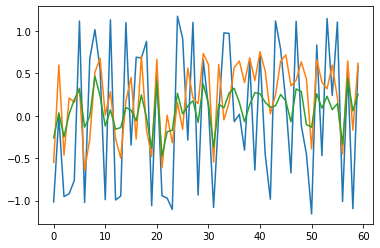

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(4)
m      = 60
w1, w2 = 0.1, 0.3
noise  = 0.1

angles  = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X       = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print(X)
plt.plot(X)
plt.show()

El siguiente código de Python usa la función *svd()* de NumPy para obtener todos los componentes principales del conjunto de entrenamiento, luego extrae las dos primeras PC:

In [2]:
import numpy as np
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
#print(c1)
#print(c2)
print(s.shape)
print(np.diag(s))

(3,)
[[6.77645005 0.         0.        ]
 [0.         2.82403671 0.        ]
 [0.         0.         0.78116597]]


In [3]:
m, n      = X.shape
S         = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)
print(S)
np.allclose(X_centered, U.dot(S).dot(Vt))

[[6.77645005 0.         0.        ]
 [0.         2.82403671 0.        ]
 [0.         0.         0.78116597]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.  

True

**NOTA:** PCA supone que el conjunto de datos se centra en el origen. Como veremos, las clases de PCA de Scikit-Learn se encargan de centrar los datos por usted. Sin embargo, si implementa PCA usted mismo (como en el ejemplo anterior), o si usa otras bibliotecas, **no olvide centrar los datos primero**.

### Projecting down to $d$ dimensions

El siguiente código de Python proyecta el conjunto de entrenamiento en el plano definido por los dos primeros componentes principales:

In [4]:
W2            = Vt.T[:, :2]
X2D           = X_centered.dot(W2)
X2D_using_svd = X2D
print(X2D_using_svd)

[[-1.26203346 -0.42067648]
 [ 0.08001485  0.35272239]
 [-1.17545763 -0.36085729]
 [-0.89305601  0.30862856]
 [-0.73016287  0.25404049]
 [ 1.10436914 -0.20204953]
 [-1.27265808 -0.46781247]
 [ 0.44933007 -0.67736663]
 [ 1.09356195  0.04467792]
 [ 0.66177325  0.28651264]
 [-1.04466138  0.11244353]
 [ 1.05932502 -0.31189109]
 [-1.13761426 -0.14576655]
 [-1.16044117 -0.36481599]
 [ 1.00167625 -0.39422008]
 [-0.2750406   0.34391089]
 [ 0.45624787 -0.69707573]
 [ 0.79706574  0.26870969]
 [ 0.66924929 -0.65520024]
 [-1.30679728 -0.37671343]
 [ 0.6626586   0.32706423]
 [-1.25387588 -0.56043928]
 [-1.04046987  0.08727672]
 [-1.26047729 -0.1571074 ]
 [ 1.09786649 -0.38643428]
 [ 0.7130973  -0.64941523]
 [-0.17786909  0.43609071]
 [ 1.02975735 -0.33747452]
 [-0.94552283  0.22833268]
 [ 0.80994916  0.33810729]
 [ 0.20189175  0.3514758 ]
 [-1.34219411 -0.42415687]
 [ 0.13599883  0.37258632]
 [ 0.8206931  -0.55120835]
 [ 0.90818634 -0.31869127]
 [ 0.06703671  0.42486148]
 [ 0.13936893  0.41906961]
 

¡Ahí tenemoss!. Ahora sabemos cómo reducir la dimensionalidad de cualquier conjunto de datos a cualquier cantidad de dimensiones, al tiempo que se conserva la mayor variación posible.

### Using scikit-learn

La clase PCA de Scikit-Learn implementa PCA usando la descomposición SVD como lo hicimos antes. El siguiente código aplica PCA para reducir la dimensionalidad del conjunto de datos a dos dimensiones (tenga en cuenta que automáticamente se encarga de centrar los datos):

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

Después de ajustar el transformador PCA al conjunto de datos, puede acceder a los componentes principales utilizando la variable *components_* (tenga en cuenta que contiene las PC como vectores horizontales, por lo que, por ejemplo, el primer componente principal es igual a *pca.components_.T[:, 0]*).

In [6]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [7]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

Tenga en cuenta que ejecutar PCA varias veces en conjuntos de datos ligeramente diferentes puede dar como resultado resultados diferentes. En general, la única diferencia es que algunos ejes pueden voltearse. **En este ejemplo, PCA que usa Scikit-Learn ofrece la misma proyección que la que ofrece el enfoque SVD, excepto que ambos ejes están invertidos**:

In [8]:
np.allclose(X2D, -X2D_using_svd)

True

Ahora vamos a recuperar los puntos 3D proyectados en el plano (subespacio PCA 2D).

In [9]:
X3D_inv = pca.inverse_transform(X2D)

Por supuesto, **hubo cierta pérdida de información durante el paso de proyección**, por lo que los puntos 3D recuperados *no son exactamente iguales a los puntos 3D originales*:

In [10]:
np.allclose(X3D_inv, X)

False

Podemos calcular el error de reconstrucción:

In [11]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

La transformación inversa en el enfoque SVD se ve así:

In [12]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

Las reconstrucciones de ambos métodos **no son idénticas** porque la clase PCA de Scikit-Learn se encarga automáticamente de revertir el centrado medio, *pero si restamos la media, obtenemos la misma reconstrucción*:

In [13]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

El objeto PCA da acceso a los componentes principales que calculó:

In [14]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

Comparemoslos con los primeros dos componentes principales calculados usando el método SVD:

In [15]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

### Explained variance ratio

Por ejemplo, veamos las razones de varianza explicadas de los dos primeros componentes del conjunto de datos 3D representados 

In [16]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

Esto le indica que **el 84.2% de la varianza del conjunto de datos se encuentra a lo largo del primer eje**, y el **14.6% se encuentra a lo largo del segundo eje**. Esto deja menos del 1.2% para el tercer eje, por lo que es razonable suponer que probablemente lleve poca información.

Ahora vamos a explicar cómo calcular la razón de varianza explicada utilizando el enfoque SVD (recuerde que $s$ es la diagonal de la matriz $\mathbf{S}$):

In [17]:
print(s)
print(np.square(s))
print(np.square(s).sum())
np.square(s) / np.square(s).sum()

[6.77645005 2.82403671 0.78116597]
[45.92027533  7.97518336  0.61022027]
54.50567895729197


array([0.84248607, 0.14631839, 0.01119554])

### Choosing the right number of dimensions

El siguiente código calcula PCA sin reducir la dimensionalidad, luego calcula el número mínimo de dimensiones requeridas para preservar el 95% de la variación del conjunto de entrenamiento:

In [18]:
from sklearn.datasets import fetch_openml

mnist        = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d      = np.argmax(cumsum >= 0.95) + 1
d

154

También podemos establecer *n_components = d* y ejecutar PCA nuevamente. Sin embargo, hay una opción mucho mejor: en lugar de especificar el número de componentes principales que desea conservar, puede establecer *n_components* para que sea flotante entre 0.0 y 1.0, lo que indica la relación de varianza que desea conservar:

In [19]:
pca       = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

154

In [20]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557437

Otra opción más es **trazar la varianza explicada en función del número de dimensiones** (simplemente trazar *cumsum*; ver Figura a continuación). Por lo general, habrá un codo en la curva, donde la variación explicada deja de crecer rápidamente. Puede pensar en esto como la dimensionalidad intrínseca del conjunto de datos. En este caso, puede ver que reducir la dimensionalidad a unas 100 dimensiones no perdería demasiada varianza explicada.

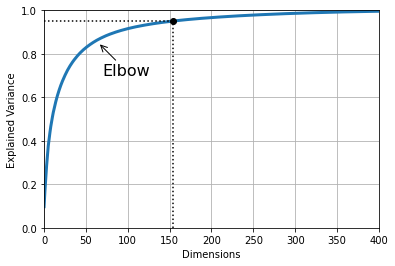

In [21]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

### PCA for Compression

 **Ejemplo:** intentemos aplicar PCA al conjunto de datos MNIST mientras conserva el $95\%$ de su varianza. Debería encontrar que cada instancia tendrá un poco más de $150$ características, en lugar de las características $784$ originales. 

In [22]:
pca       = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

154

Entonces, aunque se conserva la mayor parte de la variación, ¡el conjunto de datos ahora es inferior al $20\%$ de su tamaño original!. Esta es una relación de compresión razonable, y podemos ver cómo esto puede acelerar enormemente un algoritmo de clasificación (como un clasificador SVM).

**Ejemplo:** En el siguiente código se comprime el conjunto de datos MNIST a $154$ dimensiones, luego usa el método *inverse_transform()* para descomprimirlo nuevamente a $784$ dimensiones. La  siguiente Figura muestra algunos dígitos del conjunto de entrenamiento original (a la izquierda) y los dígitos correspondientes después de la compresión y descompresión. Puede ver que hay una ligera pérdida de calidad de imagen, pero los dígitos aún están casi intactos.

Text(0.5, 1.0, 'Compressed')

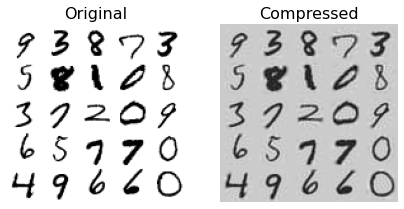

In [23]:
import matplotlib as mpl

pca         = PCA(n_components = 154)
X_reduced   = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

def plot_digits(instances, images_per_row=5, **options):
    size           = 28
    images_per_row = min(len(instances), images_per_row)
    images         = [instance.reshape(size,size) for instance in instances]
    n_rows         = (len(instances) - 1) // images_per_row + 1
    row_images     = []
    n_empty        = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

#save_fig("mnist_compression_plot")

### Randomized PCA

In [24]:
rnd_pca       = PCA(n_components=154, svd_solver="randomized")
X_reduced     = rnd_pca.fit_transform(X_train)
X_reduced_pca = X_reduced

De manera predeterminada, *svd_solver* en realidad está configurado como *"auto": Scikit-Learn usa automáticamente el algoritmo PCA aleatorizado si $m$ o $n $es mayor que 500 y %d% es menor al $80\%$ de $m$ o $n$, o si no usa el enfoque SVD completo. Si desea forzar a Scikit-Learn a usar SVD completo, puede configurar el hiperparámetro *svd_solver* en *"full"*.

### Incremental PCA

**Ejemplo:** El siguiente código divide el conjunto de datos MNIST en $100$ mini lotes (usando la función *array_split()* de NumPy) y los alimenta a la clase *IncrementalPCA* de Scikit-Learn para reducir la dimensionalidad del conjunto de datos MNIST a $154$ dimensiones (como antes). Tenga en cuenta que debe llamar al método *partial_fit()* con cada mini lote en lugar del método *fit()* con todo el conjunto de entrenamiento:

....................................................................................................

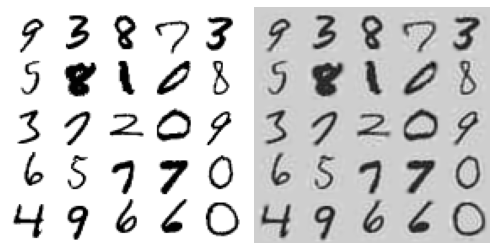

In [25]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca   = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced           = inc_pca.transform(X_train)
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [26]:
X_reduced_inc_pca = X_reduced

Comparemos los resultados de transformar MNIST usando PCA regular y PCA incremental. Primero, los promedios son iguales:

In [27]:
np.allclose(pca.mean_, inc_pca.mean_)

True

Pero los resultados no son exactamente idénticos. El PCA incremental brinda una muy buena solución aproximada, pero no es perfecta:

In [28]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

Alternativamente, puede usar la clase *memmap* de NumPy, que le permite manipular una gran matriz almacenada en un archivo binario en el disco como si estuviera completamente en la memoria; la clase carga solo los datos que necesita en la memoria, cuando los necesita. Como la clase *IncrementalPCA* usa solo una pequeña parte de la matriz en un momento dado, el uso de la memoria permanece bajo control. Esto hace posible llamar al método habitual *fit()*, como puede ver en el siguiente código:

Creemos la estructura *memmap()* y copiemos los datos MNIST en ella. Esto normalmente lo haría un primer programa:

In [30]:
from tempfile import mkdtemp
import os.path as path
filename = path.join(mkdtemp(), 'my_mnist.data')
m, n     = X_train.shape

X_mm    = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

Ahora, eliminar el objeto *memmap()* activará su finalizador de Python, lo que garantiza que los datos se guarden en el disco.

In [31]:
del X_mm

Luego, otro programa cargaría los datos y los usaría para el entrenamiento:

In [32]:
X_mm       = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))
batch_size = m // n_batches
inc_pca    = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

In [33]:
rnd_pca   = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### Kernel PCA

**Ejemplo:** el siguiente código utiliza la clase *KernelPCA* de Scikit-Learn para realizar kPCA con un kernel RBF:

In [34]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

from sklearn.decomposition import KernelPCA

rbf_pca   = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

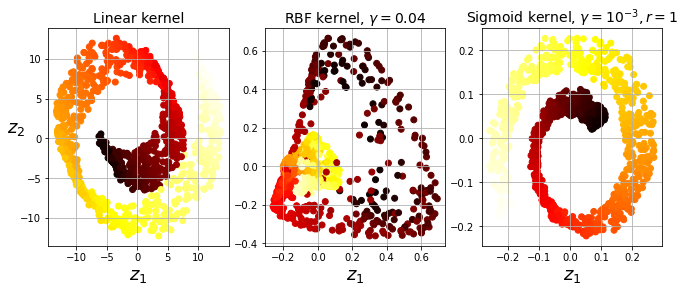

In [35]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

#save_fig("kernel_pca_plot")
plt.show()

La Figura muestra el rollo suizo, reducido a dos dimensiones usando un núcleo lineal (equivalente a simplemente usar la clase *PCA*), un núcleo RBF y un núcleo sigmoide (Logístico).

### kPCA: Selecting a kernel and tuning hyperparameters

Como kPCA es un algoritmo de aprendizaje no supervisado, *no existe una medida de rendimiento obvia para ayudarlo a seleccionar los mejores valores de kernel e hiperparámetros*. Sin embargo, la reducción de dimensionalidad es a menudo un paso de preparación para una tarea de aprendizaje supervisada (por ejemplo, clasificación), por lo que simplemente puede usar la **búsqueda de cuadrícula** para seleccionar el núcleo y los hiperparámetros conducen al mejor rendimiento en esa tarea.

**Ejemplo:** el siguiente código crea una guía de dos pasos, primero reduciendo la dimensionalidad a dos dimensiones usando kPCA, luego aplicando Regresión logística para la clasificación. Luego usa *GridSearchCV* para encontrar el mejor valor de kernel y gamma para kPCA para obtener la mejor precisión de clasificación al final de la guía:

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

Los mejores kernels e hiperparámetros están disponibles a través de la variable *best_params_*:

In [37]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


**Tal vez se pregunte cómo realizar la reconstrucción de una instancia proyectada con kPCA?**. Una solución es entrenar un modelo de regresión supervisado, con las instancias proyectadas como el conjunto de entrenamiento y las instancias originales como los objetivos. Scikit-Learn lo hará automáticamente si configura *fit_inverse_transform = True*, como se muestra en el siguiente código:

In [38]:
rbf_pca    = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced  = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.786308795766125

Ahora podemos usar la búsqueda de cuadrícula con validación cruzada para encontrar el núcleo y los hiperparámetros que minimizan este error de reconstrucción pre-imagen.

## Locally Linear Embedding (LLE)

In [39]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [40]:
from sklearn.manifold import LocallyLinearEmbedding

lle       = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

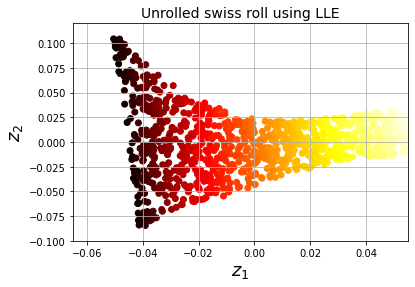

In [41]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

#save_fig("lle_unrolling_plot")
plt.show()

RESULTADO:
- Como podemos ver, el rollo suizo está completamente desenrollado y **las distancias entre las instancias están localmente bien conservadas**. 
- Sin embargo, **las distancias no se conservan a mayor escala**: la parte derecha del rollo suizo desenrollado se estira, mientras que la parte izquierda se aprieta. Sin embargo, LLE hizo un buen trabajo modelando el múltiple.

## Other dimensionality reduction technique

In [42]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [43]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [44]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

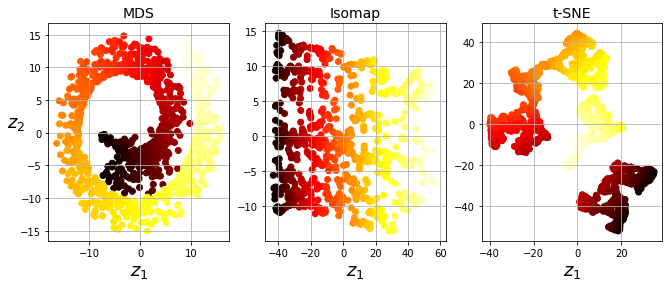

In [46]:

titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

#save_fig("other_dim_reduction_plot")
plt.show()